Heatmap (70 points):
1. state your business question in the python code file. ( you can use the same one in homework 1 or a different one).
2. introduce your data set related to this question, and summarize your data set (use at least one table and one plot).
3. present the heatmap for your data set and determine whether some columns need to be removed or not.

Linear Regression (30 points)
1. load a data set into python (can be the same one as in Heatmap or a different one), and then run a linear regression after splitting it into training and test/validation data sets. 
2. explain what you have found out (like RMSE values, MAE values, or other performance measures).

Heatmap

1. Business Question: Does the number of Kilometres has an impacted in Toyota cars' prices and/or other variables?


In [63]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pylab as plt
import os
import calendar
import networkx as nx
from pandas.plotting import scatter_matrix, parallel_coordinates
from sklearn import preprocessing


In [64]:
cars_df = pd.read_csv('/Users/ashleyrabanales/OneDrive - Georgia State University/Spring 2023 Course/Business Machine Learning/rabanales_ML/Homework/ToyotaCorolla.csv')
print('Toyota!')
cars_df.shape

Toyota!


(1436, 39)

In this dataset, I see there's a mixed of categorical variables and integers which can be used for many methods such as scatterplots and/or barcharts

In [65]:
#to see an overview if the data has been imported and showing
cars_df.head(10)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,0,0,1,1,0,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,0,0,0,1,1,0,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,1,0,0,0,1,0,0,0,0


In [66]:
#Seeing the names of the columns and how they are currently format
cars_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [67]:
#description of int variables
cars_df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2a. Scatterplot:

I used scatterplot for Price and KM (Kilometre)

I can see the higher the Km is the lower the price of the toyota car is, vice-versa
The lower the KM the higher the price.

<AxesSubplot:xlabel='Price', ylabel='KM'>

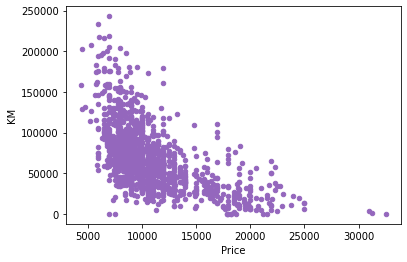

In [68]:
cars_df = cars_df.rename(columns={'Price. MEDV': 'Price_MEDV'})
cars_df.plot.scatter(x='Price', y='KM', color='C4', legend=False)

2b. Histogram:
Price range of Toyota cars/trucks

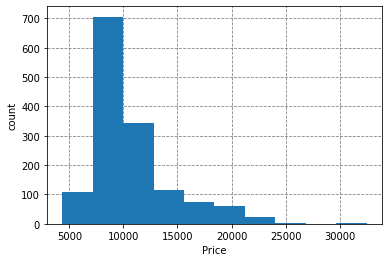

In [42]:

fig, ax = plt.subplots()
ax.hist(cars_df.Price)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('Price')
ax.set_ylabel('count')
plt.show()

2b. BarChart: I used the variable Gears which they are  3, 4, 5, 6 

In [55]:
cars_df.groupby('Gears').mean()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Gears,,,,,,,,,,,,,,,,,,,,,
3,978.000000,9450.000000,58.000000,11.00000,1999.000000,47210.500000,110.000000,0.500000,1.000000,1600.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1433.000000,9950.000000,78.000000,3.00000,1998.000000,30964.000000,110.000000,0.000000,1.000000,1600.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
5,722.937410,10692.934532,55.925899,5.53741,1999.628058,68569.697842,100.842446,0.674820,0.054676,1575.514388,...,0.548201,0.976978,0.146043,0.238129,0.286331,0.768345,0.182734,0.145324,0.002878,0.280576
6,648.395349,12033.372093,56.023256,5.72093,1999.604651,69220.837209,122.232558,0.697674,0.023256,1618.604651,...,1.000000,1.000000,0.162791,0.883721,0.767442,0.883721,0.930233,0.162791,0.000000,0.186047


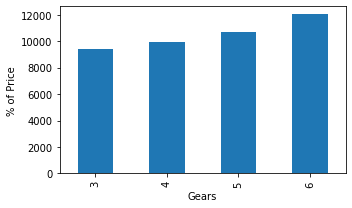

In [57]:
dataForPlot = cars_df.groupby('Gears').mean()['Price'] 
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('% of Price')

plt.tight_layout()
plt.show()

In [10]:
#checking the type of each variables
cars_df.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [70]:
# remove rows with missing values 
reduced_df = cars_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  1436


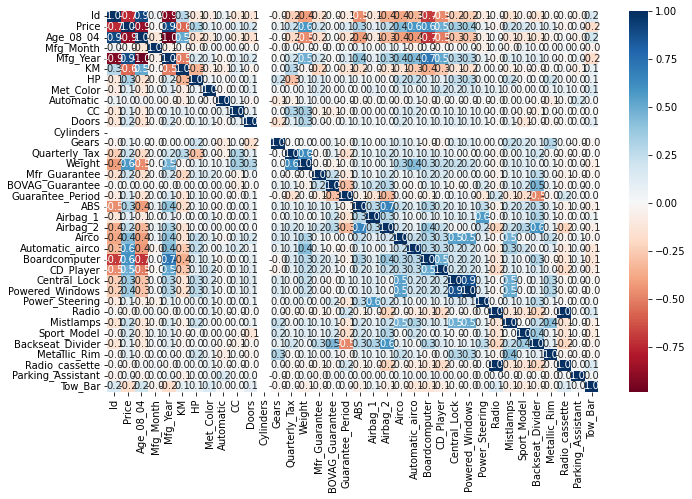

In [69]:
# Include information about values
corr = cars_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [71]:
#DROPPING SOME VARIABLES I DONT SEE MUCH CORRELATION
#Also used excel to see if they were binary or not
cars_df.drop(['Cylinders', 'Met_Color','Color', 'Radio','Tow_Bar','Parking_Assistant','Radio_cassette', 'Mfr_Guarantee', 'BOVAG_Guarantee',
'Guarantee_Period', 'Tow_Bar', 'Sport_Model', 'Gears','Metallic_Rim', 'Automatic', 'Doors', 'Mfg_Month'], axis=1, inplace=True)

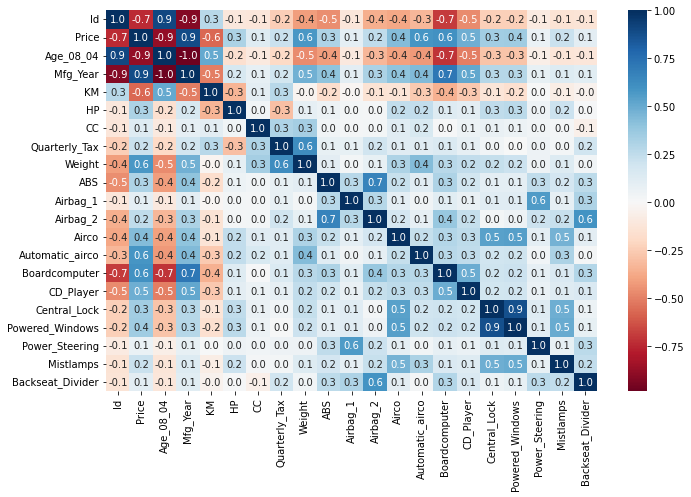

In [72]:
# Include information about values
corr = cars_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

2. Linear Regression

In [77]:
## Use table 2.11

# Data loading and preprocessing
cars_df.columns = [s.strip().replace(' ', '_') for s in cars_df.columns]
cars_df = pd.get_dummies(cars_df, prefix_sep='_', drop_first=True)

excludeColumns = ('Price', 'KM')
predictors = [s for s in cars_df.columns if s not in excludeColumns]
outcome = 'Price'

# partition data
X = cars_df[predictors]
y = cars_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y, 
    'predicted': train_pred, 
    'residual': train_y - train_pred
})
print(train_results.head())

      TOTAL_VALUE     predicted    residual
1238         7750   7789.125000  -39.125000
1085         7950   7950.015625   -0.015625
680          7950   8716.296875 -766.296875
593         10950  10950.015625   -0.015625
647          6950   7898.234375 -948.234375


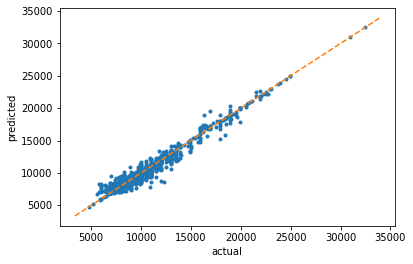

In [78]:
plt.plot(train_results.TOTAL_VALUE, train_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

In [79]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'TOTAL_VALUE': valid_y, 
    'predicted': valid_pred, 
    'residual': valid_y - valid_pred
})
print(valid_results.head())

      TOTAL_VALUE     predicted     residual
509         10900  11173.953125  -273.953125
435         10895  10397.718750   497.281250
321         10750  12426.218750 -1676.218750
1055         6500   7109.093750  -609.093750
288         11895  12387.859375  -492.859375


In [80]:
print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.TOTAL_VALUE, valid_results.predicted))

Training set r2:  0.9602436956115786
Validation set r2:  -19410668411.54638


In [91]:
#import the utility function regressionSummary
from dmba import regressionSummary
#pip install dmba


no display found. Using non-interactive Agg backend


In [92]:
# training set
regressionSummary(train_results.TOTAL_VALUE, train_results.predicted)

# validation set
regressionSummary(valid_results.TOTAL_VALUE, valid_results.predicted)


Regression statistics

                      Mean Error (ME) : -0.0070
       Root Mean Squared Error (RMSE) : 739.0152
            Mean Absolute Error (MAE) : 513.1369
          Mean Percentage Error (MPE) : -0.6416
Mean Absolute Percentage Error (MAPE) : 5.2970

Regression statistics

                      Mean Error (ME) : 3718601.9918
       Root Mean Squared Error (RMSE) : 487685005.0753
            Mean Absolute Error (MAE) : 109493676.5203
          Mean Percentage Error (MPE) : -28902.1013
Mean Absolute Percentage Error (MAPE) : 964940.7444
